Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [92]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [80]:
Npx = 2 # Number of plaquette in each dimension
Npy = 4
model = site.SitesPBC(Npx, Npy)

In [81]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print("Nxsites ", model.Nxsites)
print("Nyrows ", model.Nyrows)
print(model.partition)
print(model.partition[0])

Number of sites: 20
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Nxsites  4
Nyrows  5
['A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A'
 'B' 'A']
A


In [82]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]]


In [83]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(1, 1)


In [84]:
9 % 2

1

In [85]:
xx_bond, yy_bond, zz_bond = model.get_bonds()

In [86]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 5  6]
 [ 7  4]
 [ 8  9]
 [10 11]
 [13 14]
 [15 12]
 [17 18]
 [19 16]]
yy_bond:  [[ 1  2]
 [ 3  0]
 [ 4  5]
 [ 6  7]
 [ 9 10]
 [11  8]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]
zz_bond:  [[ 0  4]
 [ 2  6]
 [ 5  9]
 [ 7 11]
 [ 8 12]
 [10 14]
 [13 16]
 [15 18]]


In [87]:
    def plot_honeycomb(model):
        coords = model.get_coordinates()
        xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
        
        plt.figure(figsize=(20, 20))
        # Plot sites
        plt.scatter(coords[:, 0], coords[:, 1], color='k', zorder=3)

        # Plot bonds
        for bond in xx_bondlist:
            i, j = bond
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'r-', label='xx' if bond == xx_bondlist[0] else "", lw=2)
        for bond in yy_bondlist:
            i, j = bond
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'b-', label='yy' if bond == yy_bondlist[0] else "", lw=2)
        for bond in zz_bondlist:
            i, j = bond
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'g-', label='zz' if bond == zz_bondlist[0] else "", lw=2)

        plt.axis('equal')
        plt.axis('off')
        # Add legend only once per bond type
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        plt.show()

id 0 idx 0 idy 0
sublattice A
x 0.0
y -0.0
x 0.0 y -0.0
id 1 idx 1 idy 0
sublattice B
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
sublattice A
x 1.7320508075688772
y -0.0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
sublattice B
x 2.598076211353316 y 0.5
id 4 idx 0 idy 1
sublattice B
x 0.0 y -1.0
id 5 idx 1 idy 1
sublattice A
x 0.8660254037844386
y -1.5
x 0.8660254037844386 y -1.5
id 6 idx 2 idy 1
sublattice B
x 1.7320508075688772 y -1.0
id 7 idx 3 idy 1
sublattice A
x 2.598076211353316
y -1.5
x 2.598076211353316 y -1.5
id 8 idx 0 idy 2
last row, sublattice B
id 9 idx 1 idy 2
last row, sublattice A
id 10 idx 2 idy 2
last row, sublattice B
id 11 idx 3 idy 2
last row, sublattice A


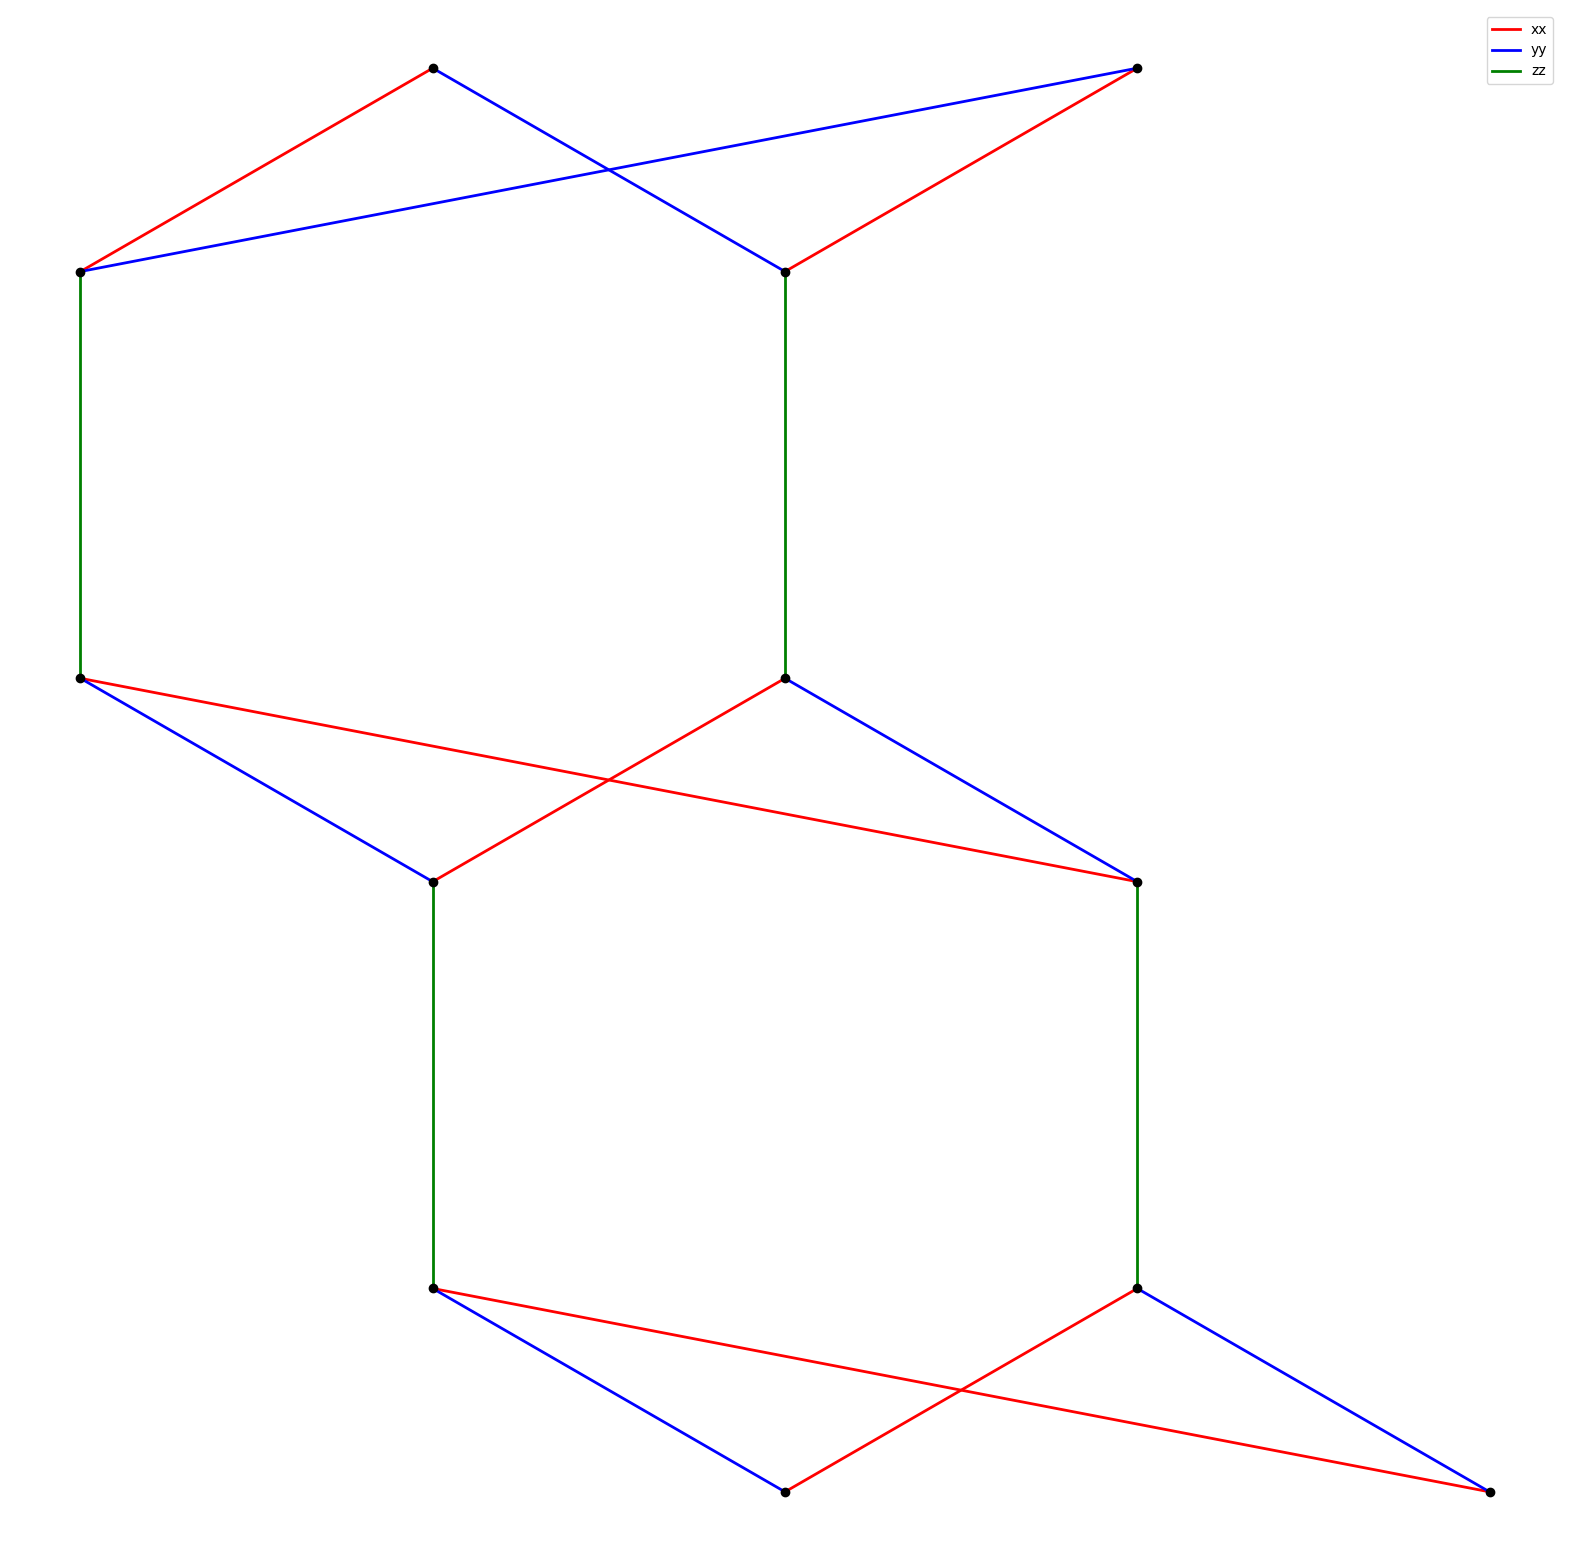

In [88]:
modell = site.SitesPBC(Npx = 2, Npy = 2)
plot_honeycomb(modell)

In [89]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

id 0 idx 0 idy 0
sublattice A
x 0.0
y -0.0
x 0.0 y -0.0
id 1 idx 1 idy 0
sublattice B
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
sublattice A
x 1.7320508075688772
y -0.0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
sublattice B
x 2.598076211353316 y 0.5
id 4 idx 0 idy 1
sublattice B
x 0.0 y -1.0
id 5 idx 1 idy 1
sublattice A
x 0.8660254037844386
y -1.5
x 0.8660254037844386 y -1.5
id 6 idx 2 idy 1
sublattice B
x 1.7320508075688772 y -1.0
id 7 idx 3 idy 1
sublattice A
x 2.598076211353316
y -1.5
x 2.598076211353316 y -1.5
id 8 idx 0 idy 2
sublattice A
x 0.0
y -3.0
x 0.0 y -3.0
id 9 idx 1 idy 2
sublattice B
x 0.8660254037844386 y -2.5
id 10 idx 2 idy 2
sublattice A
x 1.7320508075688772
y -3.0
x 1.7320508075688772 y -3.0
id 11 idx 3 idy 2
sublattice B
x 2.598076211353316 y -2.5
id 12 idx 0 idy 3
sublattice B
x 0.0 y -4.0
id 13 idx 1 idy 3
sublattice A
x 0.8660254037844386
y -4.5
x 0.8660254037844386 y -4.5
id 14 idx 2 idy 3
sublattice B
x 1.7320508075688772 y -4.0
id 15 idx 3 idy 3
sublatt

Let us try to do a 3D plot with cyclindric coordinates (not working)

In [93]:
# Place this in your notebook or script
from mpl_toolkits.mplot3d import Axes3D

def plot_honeycomb_cylinder(model, R=5):
    coords = model.get_coordinates_cylindric(R=R)
    xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Plot sites
    ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], color='k', s=10, zorder=3)
    # Plot bonds
    for bond, color in zip([xx_bondlist, yy_bondlist, zz_bondlist], ['r', 'b', 'g']):
        for i, j in bond:
            ax.plot([coords[i, 0], coords[j, 0]],
                    [coords[i, 1], coords[j, 1]],
                    [coords[i, 2], coords[j, 2]],
                    color=color, lw=2)
    ax.set_axis_off()
    plt.show()

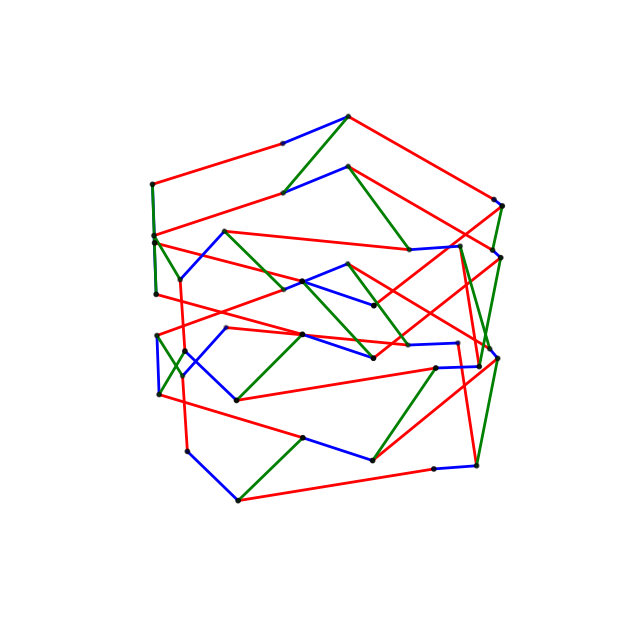

In [94]:
modell = site.SitesPBC(Npx=4, Npy=4)
plot_honeycomb_cylinder(modell, R=5)

In [47]:
# Define the Hamiltonian
def hamiltonian(model, Jxx=1.0, Jyy=1.0, Jzz=1.0):
    # H = np.zeros((model.Nsites, model.Nsites), dtype=np.complex128)
    H = sparse.csr_array((np.zeros((model.Nsites, model.Nsites), dtype=np.complex128)))  
    xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
    
    # Add xx bonds
    for i, j in xx_bondlist:
        H[i,j] += 1j * Jxx/2.
        H[j,i] += - 1j * Jxx/2.
    
    # Add yy bonds
    for i, j in yy_bondlist:
        H[i,j] += 1j * Jyy/2.
        H[j,i] += - 1j * Jyy/2.
    
    # Add zz bonds
    for i, j in zz_bondlist:
        H[i,j] += 1j * Jzz/2.
        H[j,i] += - 1j * Jzz/2.
    
    return H

In [48]:
H = hamiltonian(model)
print("Hamiltonian matrix:\n", H)

Hamiltonian matrix:
 <Compressed Sparse Row sparse array of dtype 'complex128'
	with 56 stored elements and shape (20, 20)>
  Coords	Values
  (0, 1)	0.5j
  (0, 3)	-0.5j
  (0, 4)	0.5j
  (1, 0)	-0.5j
  (1, 2)	0.5j
  (2, 1)	-0.5j
  (2, 3)	0.5j
  (2, 6)	0.5j
  (3, 0)	0.5j
  (3, 2)	-0.5j
  (4, 0)	-0.5j
  (4, 5)	0.5j
  (4, 7)	-0.5j
  (5, 4)	-0.5j
  (5, 6)	0.5j
  (5, 9)	0.5j
  (6, 2)	-0.5j
  (6, 5)	-0.5j
  (6, 7)	0.5j
  (7, 4)	0.5j
  (7, 6)	-0.5j
  (7, 11)	0.5j
  (8, 9)	0.5j
  (8, 11)	-0.5j
  (8, 12)	0.5j
  :	:
  (11, 7)	-0.5j
  (11, 8)	0.5j
  (11, 10)	-0.5j
  (12, 8)	-0.5j
  (12, 13)	0.5j
  (12, 15)	-0.5j
  (13, 12)	-0.5j
  (13, 14)	0.5j
  (13, 16)	0.5j
  (14, 10)	-0.5j
  (14, 13)	-0.5j
  (14, 15)	0.5j
  (15, 12)	0.5j
  (15, 14)	-0.5j
  (15, 18)	0.5j
  (16, 13)	-0.5j
  (16, 17)	0.5j
  (16, 19)	-0.5j
  (17, 16)	-0.5j
  (17, 18)	0.5j
  (18, 15)	-0.5j
  (18, 17)	-0.5j
  (18, 19)	0.5j
  (19, 16)	0.5j
  (19, 18)	-0.5j


/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_array is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
